In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as s

In [2]:
df_train=pd.read_csv('gisette_train.data',sep=' ')
print(df_train.shape)
df_train.head()


(5999, 5001)


,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409,Unnamed: 5000
0,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,NaN
3,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,983,0,0,0,0,0,0,NaN


In [3]:
df_test=pd.read_csv('gisette_test.data',sep=' ')
print(df_test.shape)
df_test.head()

(6499, 5001)


,983,0,956,0.1,0.2,0.3,0.4,520,0.5,0.6,...,0.4304,0.4305,968.4,0.4306,0.4307,0.4308,0.4309,0.4310,0.4311,Unnamed: 5000
0,0,0,0,0,0,0,0,0,0,695,...,0,0,687,0,0,0,0,0,0,NaN
1,0,0,703,0,0,0,0,0,0,0,...,0,0,758,0,0,983,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,498,0,0,0,NaN
3,0,0,0,0,0,0,0,980,0,976,...,0,0,0,0,0,0,0,0,0,NaN
4,632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Columns: 5001 entries, 550 to Unnamed: 5000
dtypes: float64(1), int64(5000)
memory usage: 228.9 MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Columns: 5001 entries, 983 to Unnamed: 5000
dtypes: float64(1), int64(5000)
memory usage: 248.0 MB


In [6]:
df_train.drop('Unnamed: 5000',axis=1,inplace=True)
df_test.drop('Unnamed: 5000',axis=1,inplace=True)

In [7]:
print(df_test.isnull().sum().sum())
print(df_train.isnull().sum().sum())

0
0


In [8]:
df_lab=pd.read_csv("gisette_train (1).labels")
df_lab.head()

,1
0,-1
1,1
2,1
3,1
4,1


In [9]:
df_valid=pd.read_csv('gisette_valid.data',sep=' ')
print(df_valid.shape)
df_valid.head()

(999, 5001)


,688,0,0.1,0.2,0.3,0.4,0.5,952,0.6,870,...,0.4436,0.4437,0.4438,0.4439,0.4440,494,0.4441,769.1,0.4442,Unnamed: 5000
0,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
1,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
2,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN
4,0,0,0,0,0,0,0,0,0,450,...,0,0,0,0,0,800,0,0,0,NaN


In [10]:
df_valid.drop('Unnamed: 5000',axis=1,inplace=True)

## Scalling

In [11]:
x_train=df_train.values
y_train=df_lab.values

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
x_train_sc=sc.fit_transform(x_train)

## PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=100)

In [17]:
x_pca=pca.fit_transform(x_train_sc)

## Accuracy


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lgr=LogisticRegression()

In [21]:
x_lgr=lgr.fit(x_pca,y_train)

In [22]:
y_pred=lgr.predict(x_pca)

In [23]:
accuracy_score(y_train,y_pred)

0.9791631938656443

# TEST

In [24]:
x_test=df_valid.values
y_te=pd.read_csv('gisette_valid.labels')
y_test=y_te.values

## Scaling

In [25]:
x_test_sc=sc.transform(x_test)

## PCA

In [26]:
x_pca2=pca.transform(x_test_sc)

## Accurecy

In [27]:
y_pred2=lgr.predict(x_pca2)

In [28]:
accuracy_score(y_test,y_pred2)

0.977977977977978

## KNeighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier()

In [36]:
l=[]
k=[]
m=[]
for i in range(3,15,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_pca,y_train)
    pred=knn.predict(x_pca)
    l.append(accuracy_score(y_train,pred))
    pred2=knn.predict(x_pca2)
    m.append(accuracy_score(y_test,pred2))
    k.append(i)

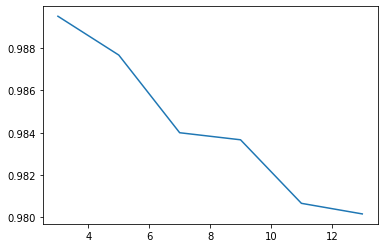

In [37]:
plt.plot(k,l)

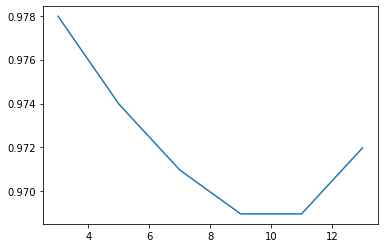

In [38]:
plt.plot(k,m)
plt.show()

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)

In [47]:
knn.fit(x_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
y_pred3=knn.predict(x_pca)

In [49]:
accuracy_score(y_train,y_pred3)

0.9894982497082847